In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator
path = 'startup_funding.csv'
df = pd.read_csv(path)

In [2]:
t5 = df.copy()

In [3]:
t5

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [4]:
t5.dropna(inplace = True, subset = ['InvestmentType'])
t5.loc[t5.CityLocation=='bangalore','CityLocation']='Bangalore'
t5.loc[t5.CityLocation=='Delhi','CityLocation']='New Delhi'

t5.loc[t5.InvestmentType=='PrivateEquity', 'InvestmentType'] = 'Private Equity'
t5.loc[t5.InvestmentType=='Crowd funding', 'InvestmentType'] = 'Crowd Funding'
t5.loc[t5.InvestmentType=='SeedFunding', 'InvestmentType'] = 'Seed Funding'

In [5]:
it = []

In [6]:
for i in t5['InvestmentType']:
    it.append(i)

In [7]:
dic = dict()

In [8]:
for i in it:
    if i in dic.keys():
        dic[i] += 1
    else:
        dic[i] = 1
dic

{'Private Equity': 1067,
 'Seed Funding': 1301,
 'Debt Funding': 1,
 'Crowd Funding': 2}

In [9]:
x = []
y = []


In [10]:
for i in dic:
    x.append(i)
    y.append(dic[i])
    

In [11]:
print(x,y)

['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding'] [1067, 1301, 1, 2]


In [12]:
npx = np.array(x)
npy = np.array(y)

In [13]:
npx = npx[np.argsort(npy)]
npy = np.sort(npy)

In [14]:
print(npx,npy)

['Debt Funding' 'Crowd Funding' 'Private Equity' 'Seed Funding'] [   1    2 1067 1301]


In [15]:
npy = npy[::-1]
npx = npx[::-1]
print(npx,npy)

['Seed Funding' 'Private Equity' 'Crowd Funding' 'Debt Funding'] [1301 1067    2    1]


([<matplotlib.patches.Wedge at 0x286bf074850>,
 [Text(-0.16768585382691156, 1.0871437137868847, 'Seed Funding'),
  Text(0.1633631250323682, -1.0878016774116774, 'Private Equity'),
  Text(1.9999719098499842, -0.010599991085218158, 'Crowd Funding'),
  Text(1.9999982443803068, -0.0026499954132951893, 'Debt Funding')],
 [Text(-0.09146501117831539, 0.5929874802473916, '54.87%'),
  Text(0.08910715910856447, -0.5933463694972785, '45.00%'),
  Text(1.4999789323874881, -0.007949993313913618, '0.08%'),
  Text(1.4999986832852301, -0.0019874965599713922, '0.04%')])

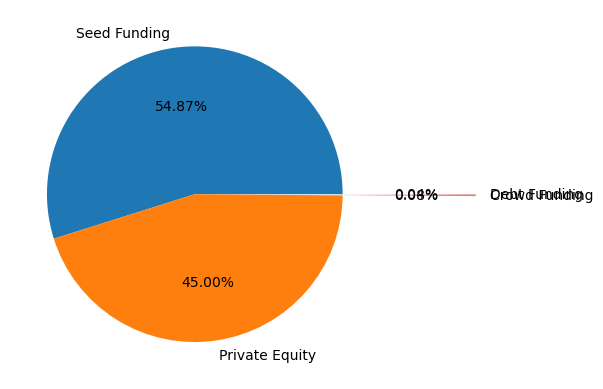

In [21]:
plt.pie(npy,labels = npx,autopct="%.2f%%",explode = [0,0,0.9,0.9])